# What Makes Your Android App Successful?
<img src="store_image1.jpeg" alt="Drawing" style="width: 700px;"/>

**	-- An analysis by Justin Pan<br>
	-- published on  Dec 15th 2018
**

## 	Project Overview
	
Mobile applications have turned into an enormously profitable business, with
Global mobile app revenue forecast for 2020 around $189 billion.
These profits are not distributed equally amongst developers, with forty-seven percent of developers making less than one-hundred USD, more than half of which make nothing at all; creating a successful application is not easy. 

**Then, what does it take for an android app to be considered successful?**
	
First of all, what the word successful actually means? An Android application would be characterized as successful if it has an amount greater than a hundred thousand downloads. When the application is ready and uploaded on Play Store, advertisement is the primary factor for a successful application. 
	
**But, what should we take into account before you start develop android app?**<br>
In this Analysis, We will use data from [Kaggle dataset](https://www.kaggle.com/lava18/google-play-store-apps).  to do a analysis on why and how some applications succeed and others do not.
We will present you the interest findings with what factors could possible make your app more popular.

**Let us begin our data scientist journey!**


### Table of Contents

1. Getting Started
  - 1.1 Required Libraries
  - 1.2 Dataset Source
  - 1.3 Read and view Data
  
2. Data Cleaning
  - 2.1 Cleaning duplicate data
  - 2.2 Processing missing value
  - 2.3 Data Type Converting
  
3. 	Exploratory Data Analysis (EDA)
  - 3.1 Correlations Between Features
  - 3.2 Data distribution
  - 3.3 Installs vs Rating
  - 3.4 Installs vs Reviews
  - 3.5 Installs vs Size
  - 3.6 App name matters?
  
4.  Predict Successful Apps with Machine Learning
  - 4.1 Predictions with Train/Test Split
  
5.  Conclusion
  - 5.1 TBD 
  - 5.2 TBD
  
6. Reference
  TBD


# 1. Getting Started

## 1.1 Required Libraries
- NumPy: the fundamental package for scientific computing with Python.
- Pandas: used for data display and partitioning
- Matplotlib - pyplot: used for plotting Pandas data into graphs and charts
- Seaborn: provides a high-level interface for graphics on top of Matplotlib
- scikit-learn: very popular machine learning library
  - linear-model: used to calculate models for multiple linear regression
  - model_selection: used to split up dataset into test and training data and evaluate predictions
  - classification_report: used to print out the report for evaulation model.

In [381]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

## 1.2 Dataset Source

Google makes data available about its applications on http://play.google.com. These pages contain data
which can be extracted such as the name of the application, the description, the number of installations, the average rating of the application, and many more features. 
Instead of scrapping directly from google web site, We will use data from [Kaggle dataset](https://www.kaggle.com/lava18/google-play-store-apps).

**googleplaystore.csv**

Dataset Features:

1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App



## 1.3 Read and View Data

Load .csv file and display the head rows to get a sense of what is contained in the dataset.

In [415]:
# read play store data
play_data = pd.read_csv("googleplaystore.csv")
play_data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 2. Data Cleaning


## 2.1 Cleaning duplicate data

In [416]:
# display duplicate App Name data
play_data[play_data.duplicated(subset='App')].count()

App               1181
Category          1181
Rating            1170
Reviews           1181
Size              1181
Installs          1181
Type              1181
Price             1181
Content Rating    1181
Genres            1181
Last Updated      1181
Current Ver       1181
Android Ver       1181
dtype: int64

In [417]:
# remove duplicates App name in play store and display count for duplicate data again for confirmation
play_data=play_data.drop_duplicates(subset='App')
play_data[play_data.duplicated()].count()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [418]:
play_data.shape

(9660, 13)

## 2.2 Processing missing value
We can use seaborn to create a simple heatmap to see where we are missing data!

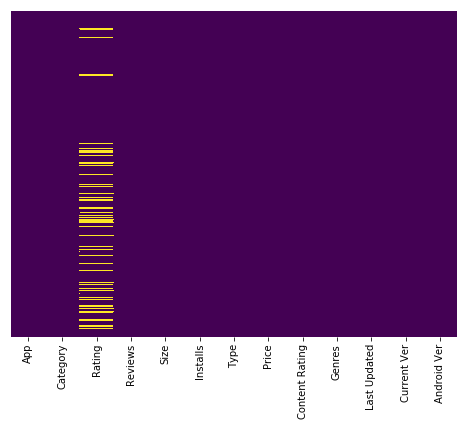

In [419]:
plt.figure(figsize=(8,6,))
sns.heatmap(play_data.isnull(), yticklabels=False,cbar = False, cmap='viridis')

In [420]:
# check missing value for play store data
print('Missing values in play store data {}'.format(play_data.isnull().sum()))

Missing values in play store data App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [421]:
# There are more missing values in Rating fields, 
# but I rather keep those data for better analysis. 
# I will drop other column missing data:
play_data.dropna(inplace=True,subset=['Type','Content Rating','Current Ver','Android Ver'])
play_data.shape


(9648, 13)

In [422]:
# Process for missing Rating data by
# filling rating in missing areas by 0 (not captured)

play_data.Rating.fillna(0,inplace=True)
print('Missing values in Google_play_store {}'.format(play_data.isnull().sum()))

Missing values in Google_play_store App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


## 2.3 Data Type Converting

In [390]:
# check column types:
play_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

We found except **Rating** which is numeric, all column types are object which is not what we expected.
We will convert following columns' type to numeric for later analysis.
* Reviews
* Size
* Installs
* price

In [423]:
# Convert Review data to numeric
play_data['Reviews'] = pd.to_numeric(play_data['Reviews'],errors='coerce')


In [392]:
# Convert Size to numeric
play_data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

We found following patterns in **Size**
* The unit of the Size either in M or K, we need make them consistent.
* **'Varies with device** need to be converted to average size in the same category
* + used 



In [424]:
# replace M with 10^6, K with 10^3, remove +
play_data['Size'].replace('Varies with device', np.nan, inplace = True ) 
play_data.Size = (play_data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             play_data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

# calculate average size within the same category
play_data['avg_size'] = play_data.groupby(['Category'],as_index=False)['Size'].transform('mean')

# fill in na with average size
play_data['Size'] = play_data['Size'].fillna(play_data['avg_size'])
play_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,avg_size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1.252951e+07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1.252951e+07
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1.252951e+07
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1.252951e+07
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1.252951e+07


In [425]:
# convert Installs to numeric
play_data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

We found "+" and "," were in **Installs**, then we need remove them.

In [426]:
# remove + and ,
play_data['Installs']=play_data['Installs'].str.replace(r'\D','').astype(float)
play_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,avg_size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1.252951e+07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1.252951e+07
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1.252951e+07
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1.252951e+07
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1.252951e+07


In [427]:
# convert Price column to numeric
play_data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

We need remove $ from **Price** column.

In [428]:
play_data['Price']=play_data['Price'].str.replace('$','').astype(float)
play_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,avg_size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1.252951e+07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1.252951e+07
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1.252951e+07
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1.252951e+07
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1.252951e+07


Now, our dataset is clean and ready to be used for further analysis.
Let us check again for data type and missing data.

In [431]:
# check column types:
play_data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
avg_size          float64
dtype: object

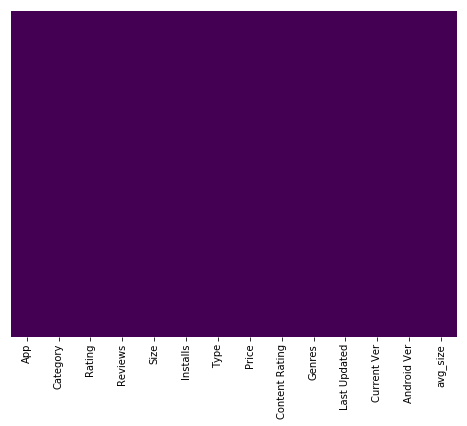

In [432]:
plt.figure(figsize=(8,6,))
sns.heatmap(play_data.isnull(), yticklabels=False,cbar = False, cmap='viridis')

### 3. Exploratory Data Analysis (EDA)
**Determine Success Metrics:** The most obvious choice for a success metric would be revenue, however this information is among the small amount of information not available publically. Instead, we use number of installations as a proxy for success.<br>
I will use an app with more that 100,000 downloads as measurement for a success app.
In this section, we will focus on the Installations and how other factors can affect them. 


## 3.1 Correlations  Between Features

Let us do a basic exploratory analysis using **seaborn heatmap** to look for correlations between features.

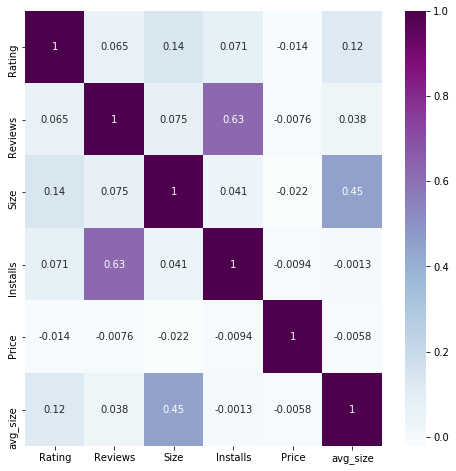

In [435]:
#plot heat map
plt.figure(figsize=(8,8))
sns.heatmap(play_data.corr(), annot = True, cmap = 'BuPu')
plt.show()

There's one noticeable strong relation between **Reviews** and **Installs** which could mean that people tend to download more reviewed apps than most rated apps.
We like to do more research more about following relationships:
* Installs vs Rating
* Installs vs Reviews
* Installs vs Size
* Installs vs Price


Finally, We use a pairplot with the hue defined by the **Type** column feature.
This is the basic exploratory analysis to look for any evident patterns or relationships between the features.

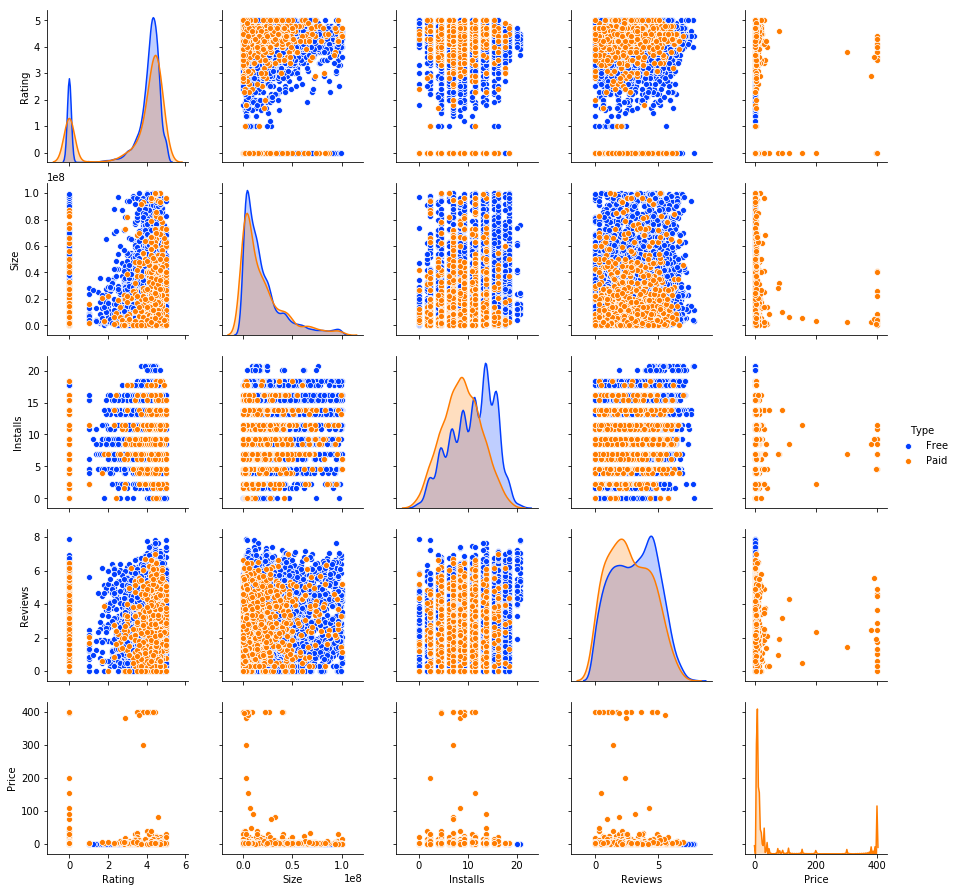

In [437]:
# slow, maybe remove later
x = play_data['Rating']
y = play_data['Size']
z = play_data['Installs'][play_data.Installs!=0].dropna()
p = play_data['Reviews'][play_data.Reviews!=0].dropna()
t = play_data['Type']
price = play_data['Price']
p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), 
    columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), 
    hue='Type',palette="bright")

## 3.2 Data distributions

We also like to find out how applications distributed in each category.

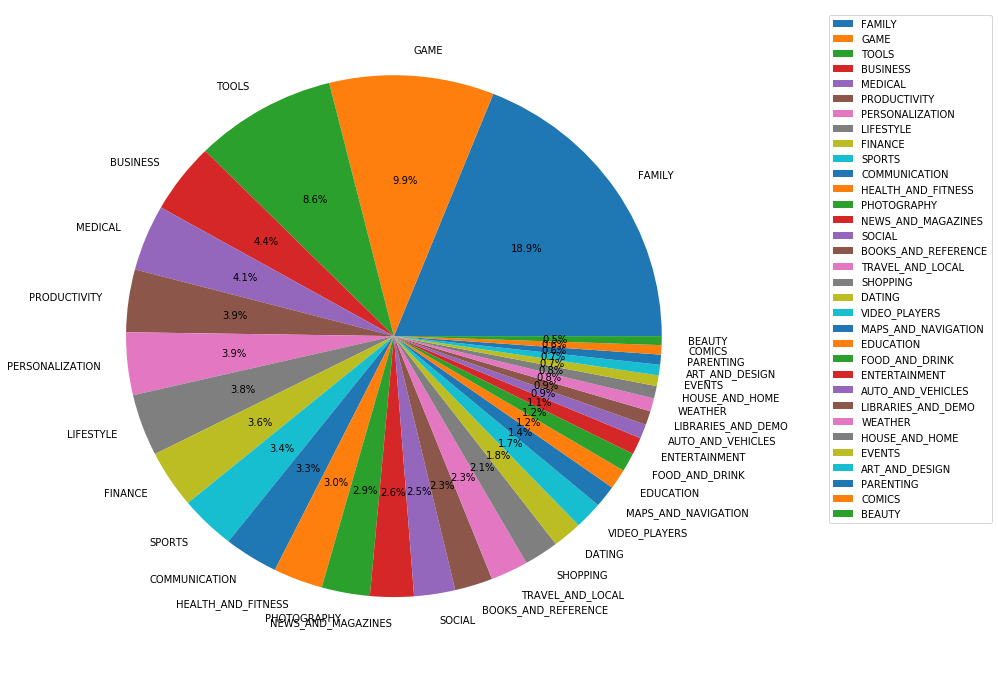

In [185]:
# plot pie chart for apps in each category

temp = play_data['Category'].value_counts().reset_index()
plt.figure(figsize=(12,12))
ax = plt.subplot(111)
plt.pie(x = temp['Category'], labels= temp['index'],autopct= '%1.1f%%')
plt.legend()
ax.legend(bbox_to_anchor=(1.4, 1))
plt.show()

We can see that Family, Game and Tools are the most populart Categories in our dataset. So you know what kind of apps you want to develop in the future.
Let us check what happens with the Installs in each Category?

In [447]:
sorted_values = sorted(play_data['Installs'].unique())
# adding column to classfied the Installs in order to easy plot
play_data['Installs_Classes'] = play_data['Installs'].replace(sorted_values, range(0,len(sorted_values)))
play_data['Installs_Classes'].head()

0     9.0
1    12.0
2    14.0
3    16.0
4    11.0
Name: Installs_Classes, dtype: float64

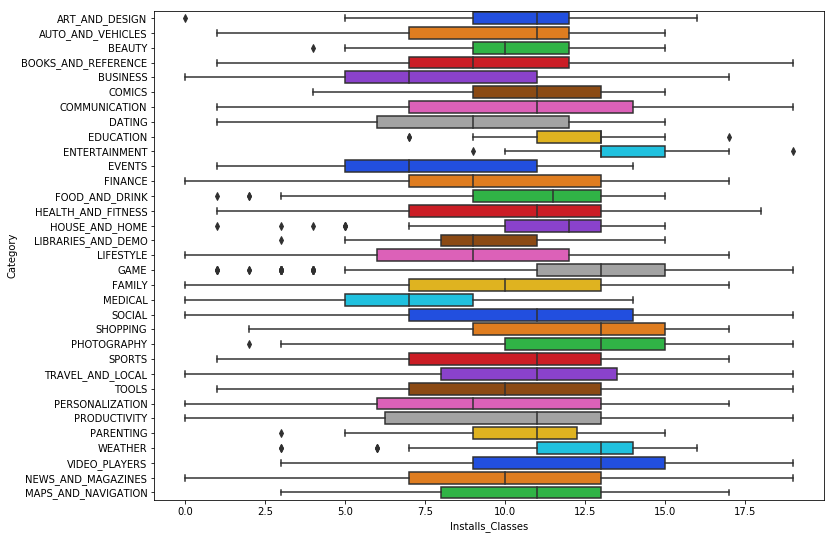

In [221]:
plt.figure(figsize=(12,9))
sns.boxplot(y = play_data['Category'], x = play_data['Installs_Classes'],\
            palette= 'bright')
plt.show()

**The top downloaded categories:**
* Communications
* Entertainment
* Video Players
* Social

If we set the successful Installs as 100,000,  the categroies which meet the criteria are:

In [213]:
play_data[play_data[['Installs']].mean(axis=1)>1e5]['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

## 3.3 Installs vs Rating

Let us checking if installs related to Rating:

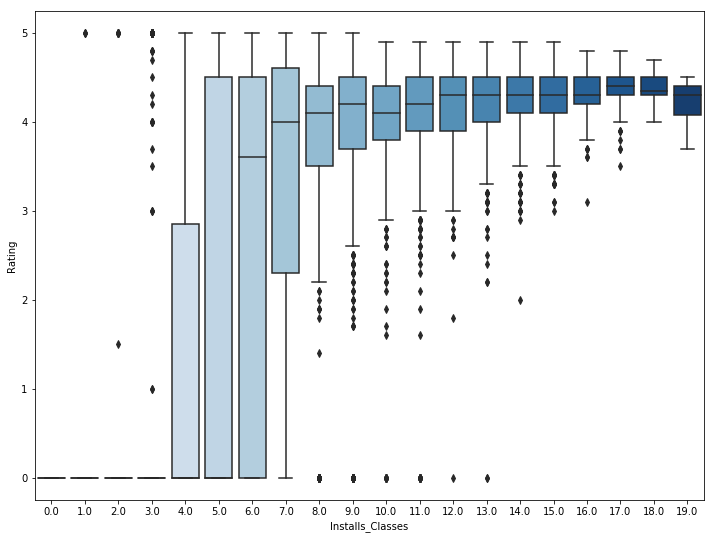

In [247]:
plt.figure(figsize=(12,9))
sns.boxplot(y = play_data['Rating'], x = play_data['Installs_Classes'],palette= 'Blues')
#sns.boxplot(y = play_data['Rating'], x = play_data['Installs'],palette= 'Blues')

plt.show()


It seems that there is less variation in **Rating** of apps with higher **Installs**.
You can also easily figure it out from scatter and line plot below.

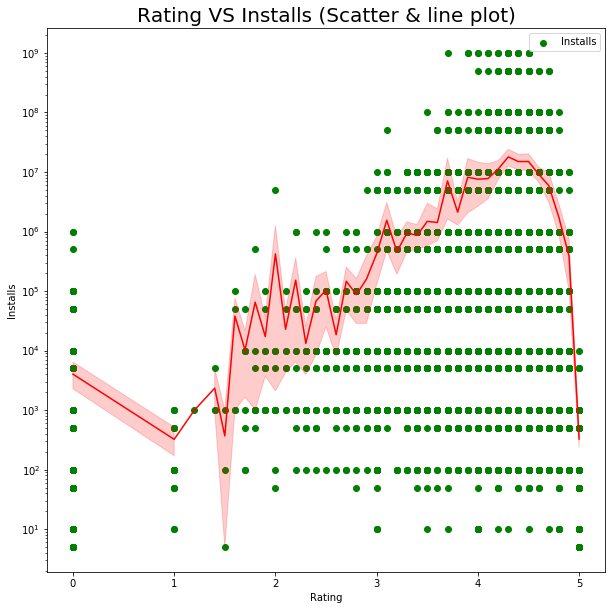

In [250]:
# anothe plot to look at
plt.figure(figsize=(10,10))
plt.scatter( x=play_data['Rating'], y=play_data['Installs'] , color = 'green')
g = sns.lineplot(x="Rating", y="Installs",color="red", data=play_data) 
plt.yscale('log')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.title('Rating VS Installs (Scatter & line plot)',size = 20)
plt.show()

It also approved there is no strong relationship between **Rating** and **Installs**.

## 3.4 Installs vs Reviews

Now, let us look into **Reviews**.From correlation heatmap, we know Installs has strong relationship with reviews.

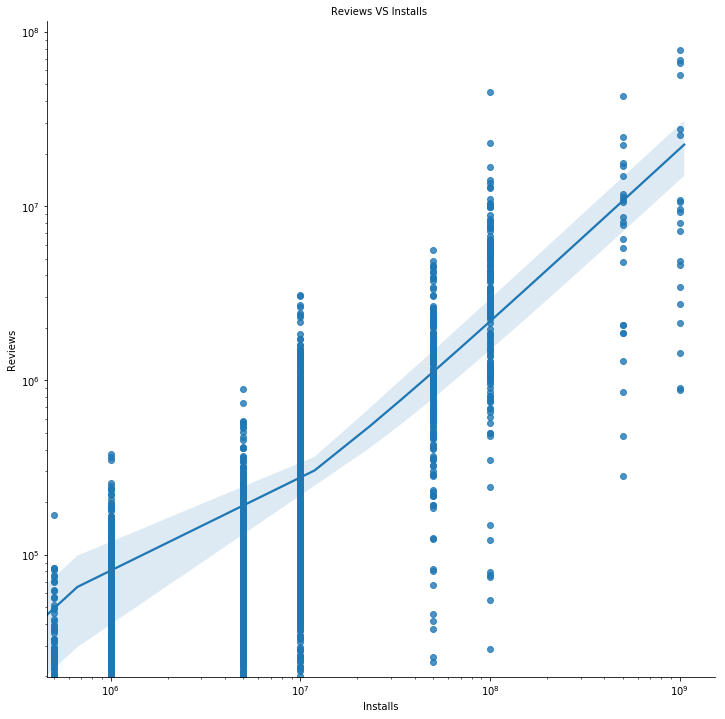

In [450]:
g = sns.lmplot(x="Installs",y="Reviews", data=play_data,size=(10))
plt.xscale('log')
plt.yscale('log')
plt.title('Reviews VS Installs ',size = 10)
plt.show()

You can see from above plot, The Reviews, unlike Rating, describe the Installs in a linear way.

## 3.5 Installs vs Size

Text(0.5,1,'Installs VS Size(kilobyte) ')

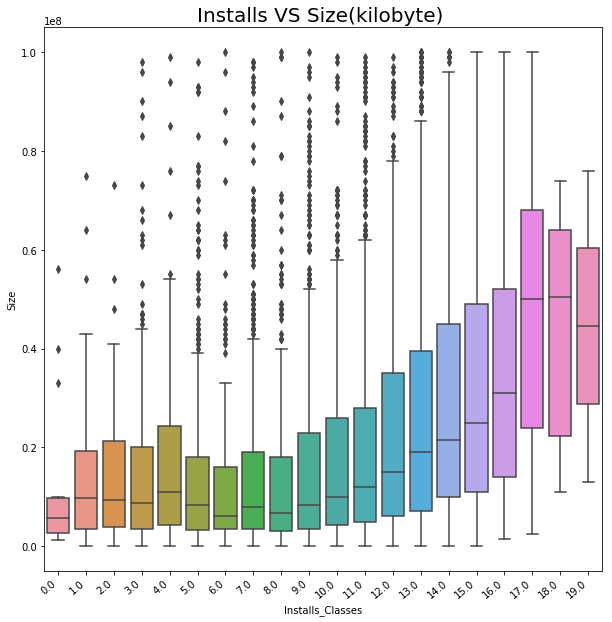

In [252]:
plt.figure(figsize=(10,10))
g = sns.boxplot(x="Installs_Classes", y="Size", data=play_data)
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
plt.title('Installs VS Size(kilobyte) ',size = 20)

The above plot showed that the **Size** increases as **Installs** increase.
After some research, I found the size increases as your app includes a lot graphic features, such as 3D models, animations, Music, Video etc.
Those extra features make your app appealing to users for download.


## 3.6 App name matters?
Have you ever wondered if the name of the App plays an impact on its number of installations!!!
Let's feed our curiousity.

Text(0.5,1,'Top 50 most frequently occuring words in Installs >10,000')

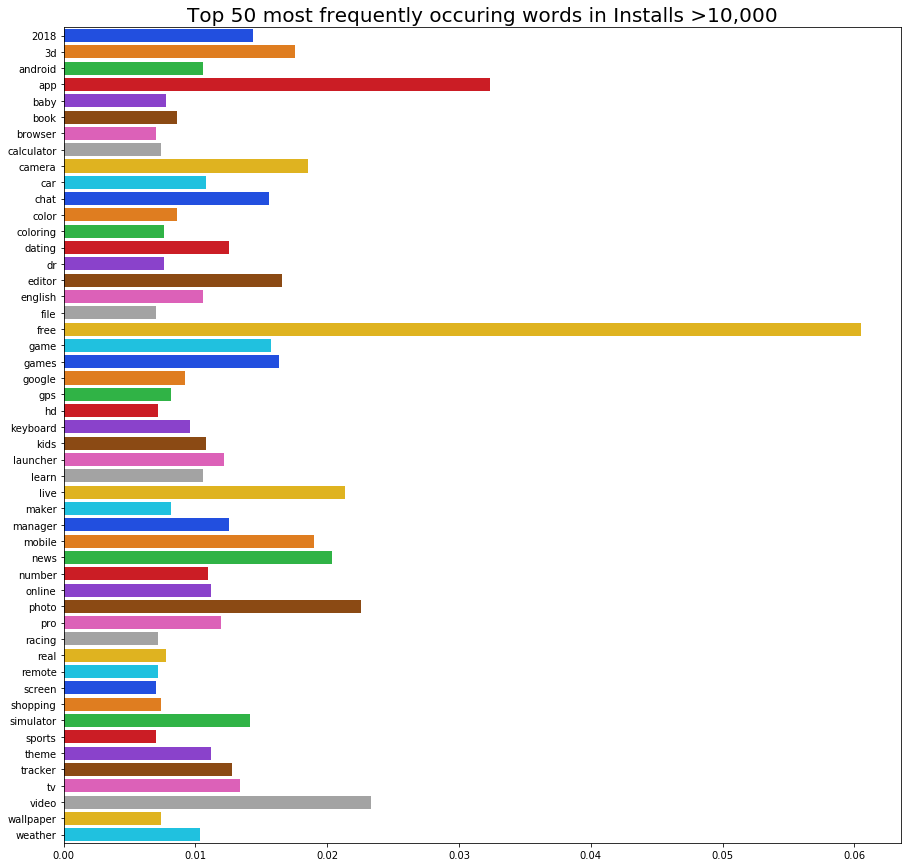

In [268]:
# get top 50 word in App names for success Installs
success_installs = play_data[(play_data['Installs'] >= 100000) ]['App']
#orpus=success_installs
vectorizer = CountVectorizer(max_features=50, stop_words='english')
X = vectorizer.fit_transform(success_installs)
names=vectorizer.get_feature_names()
values=X.toarray().mean(axis=0)

plt.figure(figsize=(15,15))
sns.barplot(x=values, y=names, palette="bright")
plt.title('Top 50 most frequently occuring words in Installs >10,000',size = 20)


You do need name your app better to make your app more popular!!

In [401]:
## prediction success of apps
#play_data['success_app'] = np.where(((play_data['Rating'] > 4.7) & (play_data['Installs'] >= 100000)),1,0)

play_data['success_app'] = np.where(((play_data['Installs'] >= 100000)),1,0)

play_data.head()
from sklearn.model_selection import train_test_split
X = play_data[['Reviews', 'Rating','Size', 'Price']]
y = play_data['success_app']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test 
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.88      0.93      0.90      1503
          1       0.93      0.88      0.91      1681

avg / total       0.90      0.90      0.90      3184

